<a href="https://colab.research.google.com/github/Keerthana-Ravichandran/Predict-the-percentage-of-a-student-based-on-the-number-of-hours-studied/blob/main/GRIP_TASK1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# THE SPARKS FOUNDATION #TSF #GRIPOCT'22

Data Science and Business Analysis Intern

Task 1: Prediction using supervised ML

Predict the percentage of a student based on the number of hours studied     



# By KEERTHANA RAVICHANDRAN

**Importing the Dependencies**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression


**Data Collection and Preprocessing**

In [ ]:
studyhours=pd.read_csv('http://bit.ly/w-data')
studyhours.head()


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
studyhours.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [ ]:
studyhours.head

<bound method NDFrame.head of     Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86>

In [ ]:
studyhours.shape

(25, 2)

In [ ]:
studyhours.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
studyhours.dtypes


Hours     float64
Scores      int64
dtype: object

In [ ]:
studyhours.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
studyhours.isnull().sum()

Hours     0
Scores    0
dtype: int64

**Plotting the graph**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


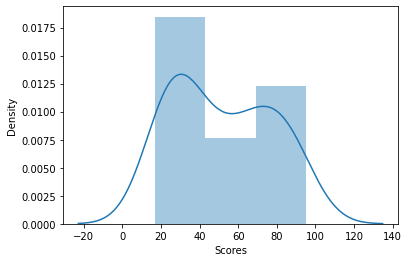

In [ ]:
sns.distplot(studyhours["Scores"])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


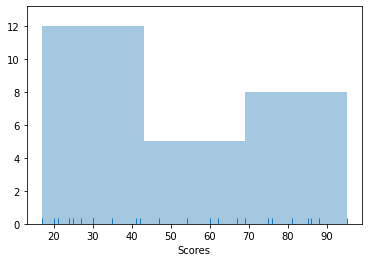

In [ ]:
sns.distplot(studyhours["Scores"], kde=False,rug=True)
plt.show()

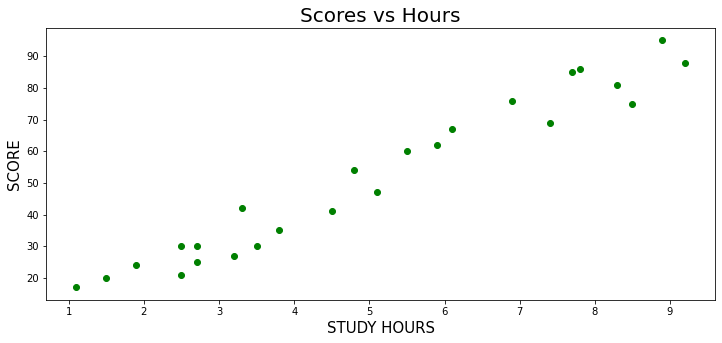

In [ ]:
plt.figure(figsize=(12,5))
plt.title('Scores vs Hours',size=20)
plt.xlabel('STUDY HOURS',size=15)
plt.ylabel('SCORE',size=15)
plt.scatter(studyhours.Hours,studyhours.Scores,color='GREEN')
plt.show()

**Correlation**

In [ ]:
studyhours.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


**Model Training**

In [ ]:
x=studyhours.iloc[:, :-1].values
y=studyhours.iloc[:,1].values

In [ ]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [ ]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

**Splitting the Data into Training data & Test Data**

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

**Linear Regression**

In [ ]:
regressor=LinearRegression()
regressor.fit(x_train.reshape(-1,1),y_train)
print("Training of the model is complete")

Training of the model is complete


**Plotting the regression line**

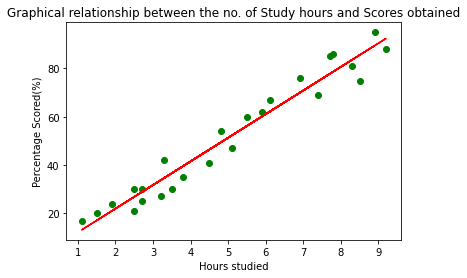

In [ ]:

line=regressor.coef_*x+regressor.intercept_
plt.scatter(x,y,color='green',marker='o')
plt.plot(x,line,color='red');
plt.title('Graphical relationship between the no. of Study hours and Scores obtained')
plt.xlabel('Hours studied')
plt.ylabel('Percentage Scored(%)')
plt.show()

In [ ]:
print('intercept={}, slope coefficient={}'.format(regressor.intercept_,regressor.coef_))

intercept=2.3708153823418883, slope coefficient=[9.78856669]


**Predicting Labels Using Linear Regression Model**

In [ ]:
print(x_test)
y_pred=regressor.predict(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]]


In [ ]:
data=pd.DataFrame({'Actual': y_test,'Predicted':y_pred})
data

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


**Accuracy Score**

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('R2:',metrics.r2_score(y_test,y_pred))

Mean Absolute Error: 4.419727808027651
Mean Squared Error: 22.965097212700428
Root Mean Squared Error: 4.7921912746363144
R2: 0.9568211104435257


**Building a Predictive System**



In [ ]:
hours =9.25
test=np.array([hours])
test=test.reshape(-1,1)
own_pred=regressor.predict(test)
print("No of hours={}".format(hours))
print("Predicted Score={}".format(own_pred[0]))

No of hours=9.25
Predicted Score=92.91505723477056
